# Multi Class Classification
This Jupyter Notebook takes multiclass text data and classifies them.

Following models are used to classify, and the performance metrics are used to visualize each model's performance:
- `scikit-learn` Models:
    - Logistic Regression
    - Naive Bayes
    - SVM (Support Vector Machine)
    - Gradient Boosting
- CNN (Convolutional Neural Network) Model
- BERT Transformer Pre-Trained Model

## 0. Import Libraries

In [1]:
import pandas as pd
from utils import *
from model_sklearn import *
from model_cnn import *
from model_bert import *
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package stopwords to /home/jiwon/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/jiwon/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to /home/jiwon/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/jiwon/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /home/jiwon/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## 1. Data Preprocessing
Note that the [News Classification](https://www.kaggle.com/datasets/kishanyadav/inshort-news) dataset from [Kaggle](https://www.kaggle.com) is used for this demo.

If there is an encoding issue with your BYOD, refer to the following encoding options: https://stackoverflow.com/a/45530363

In [2]:
df1 = pd.read_csv('data/inshort_news_data-1.csv', encoding='utf-8') # read first dataset
df2 = pd.read_csv('data/inshort_news_data-2.csv', encoding='utf-8') # read second dataset
df = pd.concat([df1, df2]) # merge them into one

df, le_name_mapping = encode_label(df)
print(le_name_mapping)

df['clean_text'] = df['text'].apply(lambda x: text_preprocess(x)) # preprocess text data
X_train, X_test, y_train, y_test = train_test_split(df["clean_text"], df["target"], test_size=0.2, shuffle=True) # 8:2 = train:test set split = d

{'automobile': 0, 'entertainment': 1, 'politics': 2, 'science': 3, 'sports': 4, 'technology': 5, 'world': 6}


## 2. EDA (Exploratory Data Analysis)
In this step, the input text data is getting analyzed.

Following information will be displayed:
- Data distribution per label
- Word count for each label
- Character count for each label
- Unique word count for each label

Data Distribution Per Label
6    1244
1    1220
4    1081
5     976
2     771
3     614
0     474
Name: target, dtype: int64


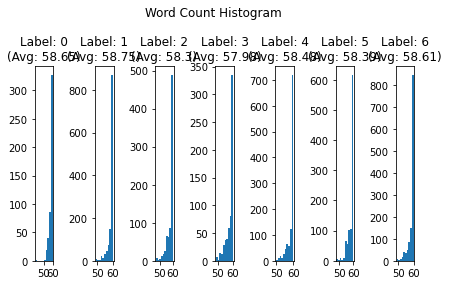

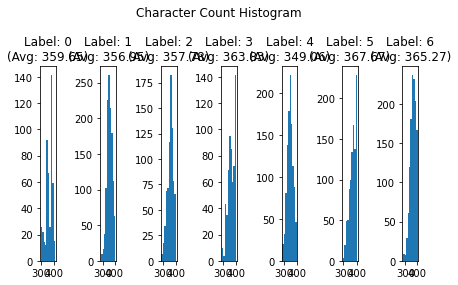

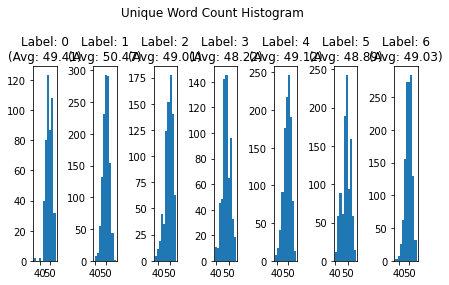

In [3]:
print("Data Distribution Per Label")
print(df['target'].value_counts())
word_count(df).show()
char_count(df).show()
unique_word_count(df).show()

## 3. TF-IDF
TF-IDF vectorize is required for scikit-learn models are required.

In [4]:
tfidf_vectorizer = TfidfVectorizer(use_idf=True, lowercase=False, stop_words='english')
X_train_vectors_tfidf = tfidf_vectorizer.fit_transform(X_train) # tfidf runs on non-tokenized sentences
X_val_vectors_tfidf = tfidf_vectorizer.transform(X_test) # no fit/train for test data, only transform

## 4. Scikit-Learn Model
Following models are getting trained and make predictions:
- Logistic Regression
- Naive Bayes
- SVM (Support Vector Machine)
- Gradient Boosting

Model:	 Logistic Regression

Train:	 0.1068 seconds
Train CPU(%):	 15.6
Train RAM(GB):	 13.35
Train RAM(%):	 42.3
Predict: 0.0004 seconds
Predict CPU(%):	 0.0
Predict RAM(GB): 13.35
Predict RAM(%):	 42.3

              precision    recall  f1-score   support

           0       0.90      0.99      0.94        83
           1       0.97      0.99      0.98       226
           2       0.98      0.97      0.97       149
           3       0.92      0.92      0.92       131
           4       0.98      0.97      0.98       223
           5       0.92      0.84      0.88       199
           6       0.91      0.95      0.93       265

    accuracy                           0.94      1276
   macro avg       0.94      0.95      0.94      1276
weighted avg       0.94      0.94      0.94      1276



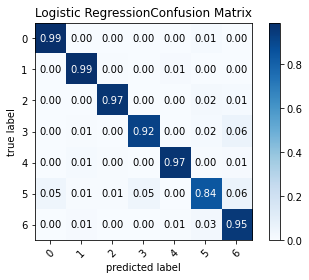

Model:	 Naive Bayes

Train:	 0.0027 seconds
Train CPU(%):	 16.1
Train RAM(GB):	 13.36
Train RAM(%):	 42.4
Predict: 0.0003 seconds
Predict CPU(%):	 0.0
Predict RAM(GB): 13.36
Predict RAM(%):	 42.4

              precision    recall  f1-score   support

           0       0.90      0.89      0.90        83
           1       0.96      0.98      0.97       226
           2       0.97      0.95      0.96       149
           3       0.92      0.82      0.87       131
           4       0.98      0.96      0.97       223
           5       0.88      0.83      0.85       199
           6       0.86      0.95      0.90       265

    accuracy                           0.92      1276
   macro avg       0.92      0.91      0.92      1276
weighted avg       0.92      0.92      0.92      1276



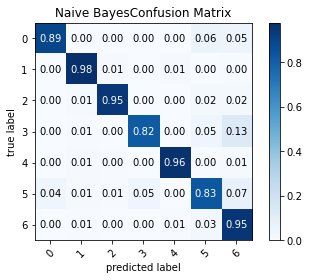

Model:	 SVM

Train:	 21.2252 seconds
Train CPU(%):	 15.9
Train RAM(GB):	 13.24
Train RAM(%):	 42.0
Predict: 0.6058 seconds
Predict CPU(%):	 15.2
Predict RAM(GB): 13.25
Predict RAM(%):	 42.0

              precision    recall  f1-score   support

           0       0.91      0.99      0.95        83
           1       0.98      0.97      0.98       226
           2       0.99      0.97      0.98       149
           3       0.93      0.95      0.94       131
           4       0.98      0.98      0.98       223
           5       0.91      0.88      0.90       199
           6       0.95      0.94      0.95       265

    accuracy                           0.95      1276
   macro avg       0.95      0.96      0.95      1276
weighted avg       0.95      0.95      0.95      1276



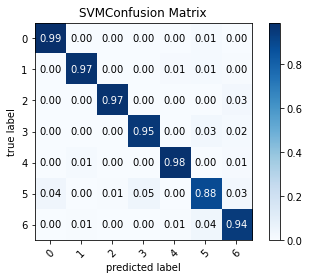

Model:	 Gradient Boosting

Train:	 14.0444 seconds
Train CPU(%):	 13.8
Train RAM(GB):	 13.24
Train RAM(%):	 42.0
Predict: 0.0062 seconds
Predict CPU(%):	 0.0
Predict RAM(GB): 13.24
Predict RAM(%):	 42.0

              precision    recall  f1-score   support

           0       0.90      0.99      0.94        83
           1       0.98      0.95      0.96       226
           2       0.97      0.97      0.97       149
           3       0.94      0.92      0.93       131
           4       0.97      0.96      0.96       223
           5       0.90      0.81      0.85       199
           6       0.85      0.93      0.89       265

    accuracy                           0.93      1276
   macro avg       0.93      0.93      0.93      1276
weighted avg       0.93      0.93      0.93      1276



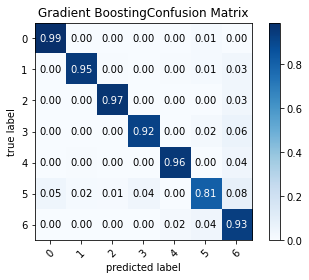

In [5]:
lg_model = Logistic(X_train_vectors_tfidf, y_train, X_val_vectors_tfidf, y_test)
lg_model.runner()

nb_model = NaiveBayes(X_train_vectors_tfidf, y_train, X_val_vectors_tfidf, y_test)
nb_model.runner()

svm_model = SVM(X_train_vectors_tfidf, y_train, X_val_vectors_tfidf, y_test)
svm_model.runner()

gb_model = GradientBoosting(X_train_vectors_tfidf, y_train, X_val_vectors_tfidf, y_test)
gb_model.runner()

## 5. CNN (Convolutional Neural Network) Model

Virtual devices cannot be modified after being initialized
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 60, 32)            160000    
                                                                 
 conv1d (Conv1D)             (None, 60, 32)            3104      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 30, 32)           0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 960)               0         
                                                                 
 dense (Dense)               (None, 250)               240250    
                                                                 
 dropout (Dropout)           (None, 250)               0       

2022-05-24 01:19:38.819870: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-24 01:19:38.823994: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-24 01:19:38.824129: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-24 01:19:38.824428: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

2022-05-24 01:19:40.153366: I tensorflow/stream_executor/cuda/cuda_dnn.cc:368] Loaded cuDNN version 8100
2022-05-24 01:19:40.836907: I tensorflow/stream_executor/cuda/cuda_blas.cc:1786] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


Train:	 20.0207 seconds
Train CPU(%):	 20.1
Train RAM(GB):	 15.63
Train RAM(%):	 49.2



2022-05-24 01:19:59.656910: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: ./model/multi_cnn/1/assets

Model saved at: ./model/1/multi_cnn

Predict: 0.094 seconds
Predict CPU(%):	 16.4
Predict RAM(GB): 15.64
Predict RAM(%):	 49.2

Accuracy: 94.98%
              precision    recall  f1-score   support

           0       0.91      0.99      0.95        83
           1       0.98      0.97      0.98       226
           2       1.00      0.97      0.99       149
           3       0.89      0.97      0.93       131
           4       0.98      0.97      0.98       223
           5       0.90      0.88      0.89       199
           6       0.96      0.92      0.94       265

    accuracy                           0.95      1276
   macro avg       0.95      0.96      0.95      1276
weighted avg       0.95      0.95      0.95      1276



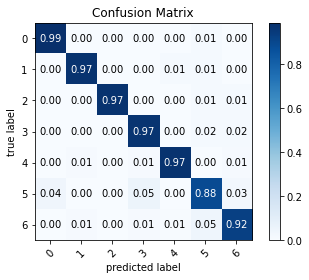

In [6]:
max_words = get_max_words(df)
num_class = len(le_name_mapping)
cnn_model = CNNMulti(X_train, y_train, X_test, y_test, max_words, num_class)
cnn_model.runner()

## 6. BERT Transformer Pre-Trained Model

Virtual devices cannot be modified after being initialized
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 text (InputLayer)              [(None,)]            0           []                               
                                                                                                  
 keras_layer (KerasLayer)       {'input_type_ids':   0           ['text[0][0]']                   
                                (None, 128),                                                      
                                 'input_mask': (Non                                               
                                e, 128),                                                          
                                 'input_word_ids':                                                
                                (No

0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

Train:	 1165.2892 seconds
Train CPU(%):	 17.5
Train RAM(GB):	 16.69
Train RAM(%):	 52.2



INFO:tensorflow:Assets written to: ./model/multi_bert/1/assets


INFO:tensorflow:Assets written to: ./model/multi_bert/1/assets


Predict: 3.8821 seconds
Predict CPU(%):	 24.1
Predict RAM(GB): 17.56
Predict RAM(%):	 54.8

Accuracy: 95.30%
              precision    recall  f1-score   support

           0       0.90      0.99      0.94        83
           1       0.97      0.98      0.98       226
           2       0.99      0.99      0.99       149
           3       0.89      1.00      0.94       131
           4       0.99      0.98      0.98       223
           5       0.92      0.86      0.89       199
           6       0.96      0.92      0.94       265

    accuracy                           0.95      1276
   macro avg       0.95      0.96      0.95      1276
weighted avg       0.95      0.95      0.95      1276



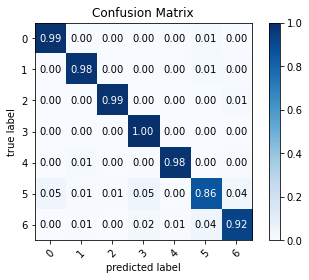

: 

In [7]:
num_class = len(le_name_mapping)
bert_model = BERTMulti(X_train, y_train, X_test, y_test, num_class)
bert_model.runner()